## Final Project Submission

Please fill out:
* Student name: MIKE KIPTOCH
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: MARK TIBA
* Blog post URL: 


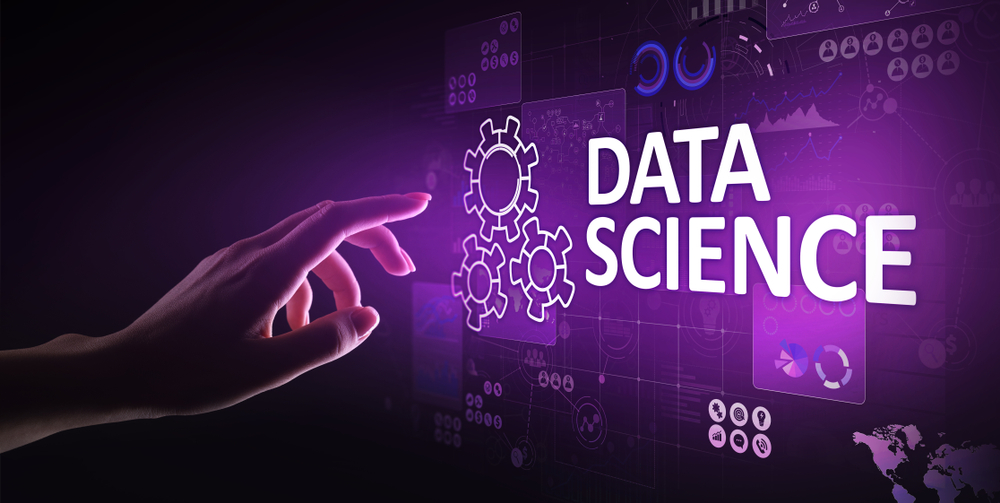

In [45]:
from PIL import Image
import IPython.display as display

img_path = "Datascience.jpg"
img = Image.open(img_path)
display.display(img)


MICROSOFT MOVIE STUDIO ANALYSIS

OVERVIEW:
Microsoft is stepping into the film business, and in order to make this venture effective, it is imperative to comprehend the state of the movie industry as it stands right now. The goal of this research is to employ exploratory data analysis (EDA) methods to identify the kinds of films that are doing well at the box office. The aim is to provide Microsoft with practical insights to develop a profitable and competitive film studio.

BUSINESS PROBLEM:
Microsoft has to choose carefully what kinds of films to develop because it lacks experience in the film industry. To direct the creation of Microsoft's new film studio, the task is to pinpoint popular genres, studios, and consumer trends.


DATA UNDERSTANDING AND DATA PREPARATION

In [46]:
#Install the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline




In [47]:
#load the data using pandas
data = pd.read_csv("c:/Users/PC/Documents/Project/MicrosoftStudio/zippedData/bom.movie_gross.csv")


data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [48]:
#check data shape
data.shape

(3387, 5)

In [49]:
# Display summary statistics
print(data.describe())


       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000


In [50]:
#check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [103]:

# Check for null values in each column and calculate the percentage
null_percentage = data.isna().sum() / len(data) * 100


print(null_percentage)



title             0.000000
studio            0.147623
domestic_gross    0.000000
foreign_gross     0.000000
year              0.000000
dtype: float64


In [56]:
# handling missing values
data['domestic_gross'].fillna(0, inplace=True)
data['foreign_gross'].fillna(0, inplace=True)


In [57]:
# drop rows with missing values
df_cleaned = data.dropna()
df_cleaned



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018
3383,Edward II (2018 re-release),FM,4800.0,0,2018
3384,El Pacto,Sony,2500.0,0,2018
3385,The Swan,Synergetic,2400.0,0,2018


In [58]:

# Check for duplicate rows in the entire DataFrame
duplicate_rows = data[data.duplicated()]

# Display the duplicate rows, if any
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []


In [59]:
# Identify and handle outliers (e.g., replace with median or mean)
Q1 = data['domestic_gross'].quantile(0.25)
Q3 = data['domestic_gross'].quantile(0.75)
IQR = Q3 - Q1
df = data[(data['domestic_gross'] >= Q1 - 1.5 * IQR) & (data['domestic_gross'] <= Q3 + 1.5 * IQR)]


In [36]:
# Verify the cleaned dataset
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB
None


CONNECT DATABASE

In [62]:
conn = sqlite3.connect('c:/Users/PC/Documents/Project/MicrosoftStudio/zippedData/im.db')


conn

In [65]:
# Connect to the SQLite database


conn = sqlite3.connect('c:/Users/PC/Documents/Project/MicrosoftStudio/zippedData/im.db')

# Create a cursor object
cur = conn.cursor()

# Get the list of all tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Print all tables
tables = cur.fetchall()
for table in tables:
    print(table)



('movie_basics',)
('directors',)
('known_for',)
('movie_akas',)
('movie_ratings',)
('persons',)
('principals',)
('writers',)


In [66]:
pd.read_sql("""
SELECT * 
FROM movie_basics;

""",conn)



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [67]:
pd.read_sql("""
SELECT * 
FROM movie_ratings;

""",conn)


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [68]:
pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
LIMIT 10;
""",conn)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",tt0112502,4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",tt0137204,8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,tt0146592,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,tt0154039,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,tt0159369,7.6,53


DATA ANALYSIS

In [69]:
data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Questions Asked From The Data
1)  Identify and determine why studios consistently lead in box office revenue, and what characteristics define their success?

2)  Analyze why yearly trends in box office performance impact Microsoft's decision on when to release movies?

3) How is box office revenue distributed across studios, and what outliers or extreme successes can be leveraged for strategic decision-making?

4) Is there a correlation between the size of a studio (measured by the number of movies produced) and its overall box office success?

1) TOP PERFOMING STUDIOS

In [73]:
print(data['studio'].unique())


['BV' 'WB' 'P/DW' 'Sum.' 'Par.' 'Uni.' 'Fox' 'Wein.' 'Sony' 'FoxS' 'SGem'
 'WB (NL)' 'LGF' 'MBox' 'CL' 'W/Dim.' 'CBS' 'Focus' 'MGM' 'Over.' 'Mira.'
 'IFC' 'CJ' 'NM' 'SPC' 'ParV' 'Gold.' 'JS' 'RAtt.' 'Magn.' 'Free' '3D'
 'UTV' 'Rela.' 'Zeit.' 'Anch.' 'PDA' 'Lorb.' 'App.' 'Drft.' 'Osci.' 'IW'
 'Rog.' nan 'Eros' 'Relbig.' 'Viv.' 'Hann.' 'Strand' 'NGE' 'Scre.' 'Kino'
 'Abr.' 'CZ' 'ATO' 'First' 'GK' 'FInd.' 'NFC' 'TFC' 'Pala.' 'Imag.' 'NAV'
 'Arth.' 'CLS' 'Mont.' 'Olive' 'CGld' 'FOAK' 'IVP' 'Yash' 'ICir' 'FM'
 'Vita.' 'WOW' 'Truly' 'Indic.' 'FD' 'Vari.' 'TriS' 'ORF' 'IM' 'Elev.'
 'Cohen' 'NeoC' 'Jan.' 'MNE' 'Trib.' 'Rocket' 'OMNI/FSR' 'KKM' 'Argo.'
 'SMod' 'Libre' 'FRun' 'WHE' 'P4' 'KC' 'SD' 'AM' 'MPFT' 'Icar.' 'AGF'
 'A23' 'Da.' 'NYer' 'Rialto' 'DF' 'KL' 'ALP' 'LG/S' 'WGUSA' 'MPI' 'RTWC'
 'FIP' 'RF' 'ArcEnt' 'PalUni' 'EpicPics' 'EOne' 'LD' 'AF' 'TFA' 'Myr.'
 'BM&DH' 'SEG' 'PalT' 'Outs' 'OutF' 'BSM' 'WAMCR' 'PM&E' 'A24' 'Cdgm.'
 'Distrib.' 'Imax' 'PH' 'HTR' 'ELS' 'PI' 'E1' 'TVC' 'FEF' 'EXCL

In [74]:
print(data[['studio', 'domestic_gross']].isnull().sum())


studio            5
domestic_gross    0
dtype: int64


In [79]:
data_cleaned = data.dropna(subset=['studio'])


In [80]:
print(data_cleaned[['studio', 'domestic_gross']].isnull().sum())


studio            0
domestic_gross    0
dtype: int64


In [99]:
# find the most Top performing studios

# Calculate median domestic gross revenue for each studio
studio_revenue = data.groupby('studio')['domestic_gross'].median().sort_values(ascending=False)

# Select the top  studios (adjust N as needed)
top_studios = studio_revenue.head(10)

# Display the top-performing studios
print("Top-Performing Studios:")
for studio, revenue in top_studios.items():
    print(f"{studio}: {revenue:,.0f}")



Top-Performing Studios:
P/DW: 157,250,000
BV: 92,100,000
WB (NL): 63,100,000
Fox: 62,150,000
Sony: 62,000,000
Uni.: 61,000,000
Par.: 57,700,000
MGM: 50,300,000
WB: 47,250,000
SGem: 39,400,000


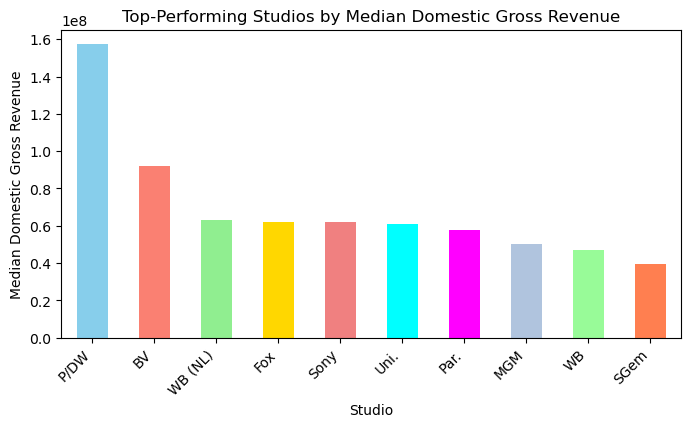

In [83]:

#Visualizations

# Define a custom list of colors for the bar plot
custom_colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'cyan', 'magenta', 'lightsteelblue', 'palegreen', 'coral']

# Bar plot for top-performing studios with custom colors
plt.figure(figsize=(8, 4))
top_studios.plot(kind='bar', color=custom_colors)
plt.title('Top-Performing Studios by Median Domestic Gross Revenue')
plt.xlabel('Studio')
plt.ylabel('Median Domestic Gross Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()


Insights:
Key Studios Identified: Studios with the highest median domestic gross revenue were identified as industry leaders.
Strategic Considerations: Microsoft can explore partnerships with these top-performing studios for industry expertise.
Market Dynamics Insight: Understanding revenue distribution provides insights into competitive dynamics in the movie industry.
Revenue Potential Evaluation: Insights into high box office success aid Microsoft in assessing revenue potential.

2) YEARLY TRENDS IMPACT

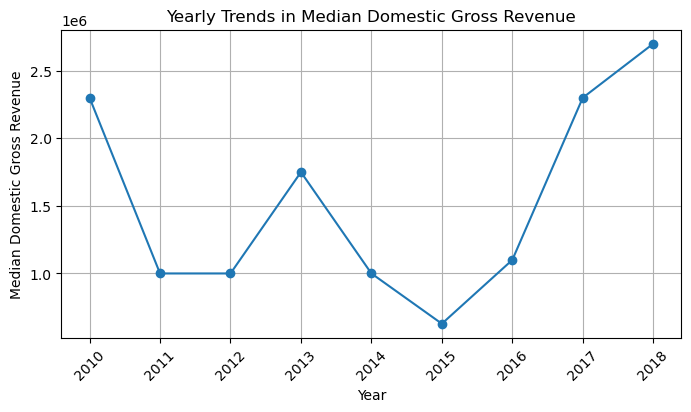

In [85]:
# Convert 'year' to datetime for better plotting
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Calculate median domestic gross revenue for each year
yearly_revenue = data.groupby(data['year'].dt.year)['domestic_gross'].median()

# Line plot for yearly trends
plt.figure(figsize=(8, 4))
plt.plot(yearly_revenue.index, yearly_revenue.values, marker='o', linestyle='-')
plt.title('Yearly Trends in Median Domestic Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Median Domestic Gross Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


This below shows the best performing Years for the Film Industry

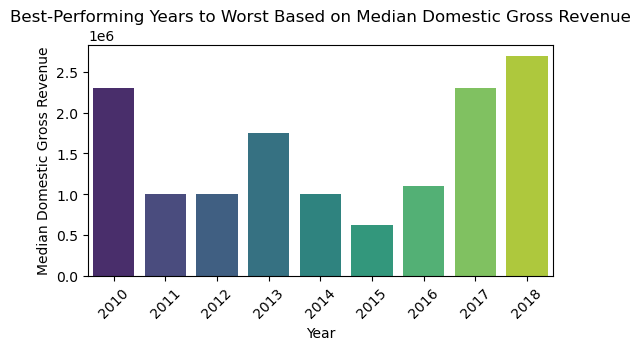

In [86]:
# Calculate median domestic gross revenue for each year
yearly_revenue = data.groupby(data['year'].dt.year)['domestic_gross'].median()

# Sort years based on median revenue in descending order
sorted_years = yearly_revenue.sort_values(ascending=False)

# Bar plot for best-performing years to worst
plt.figure(figsize=(6, 3))
sns.barplot(x=sorted_years.index, y=sorted_years.values, palette='viridis')
plt.title('Best-Performing Years to Worst Based on Median Domestic Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Median Domestic Gross Revenue')
plt.xticks(rotation=45)
plt.show()


INSIGHTS:
Across the years the data shows that there is increase in audience meaning growth in the film industry
With the growth also this indicates a resilient film industry that can withstand economic uncertainties

3) REVENUE DISTRIUTION ANALYSIS

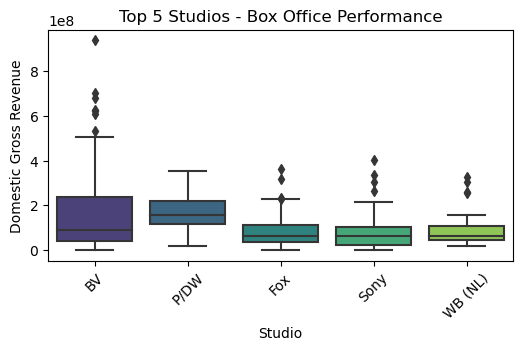

In [87]:

studio = 5  

# Determine the top studios based on median revenue
top_studios = data.groupby('studio')['domestic_gross'].median().nlargest(studio).index

# Filter the dataframe for the top  studios
df_top = data[data['studio'].isin(top_studios)]

# Boxplot for Box Office Performance by Top  Studios
plt.figure(figsize=(6, 3))
sns.boxplot(x='studio', y='domestic_gross', data=df_top, palette='viridis')
plt.title(f'Top {studio} Studios - Box Office Performance')
plt.xlabel('Studio')
plt.ylabel('Domestic Gross Revenue')
plt.xticks(rotation=45)
plt.show()



In [88]:
# Calculate statistics for each top studio
stats_df = df_top.groupby('studio')['domestic_gross'].describe()

# Display additional statistics
print(stats_df[['25%', '50%', '75%', 'min', 'max', 'mean', 'std']])


                 25%          50%          75%         min          max  \
studio                                                                    
BV        41425000.0   92100000.0  236700000.0     48500.0  936700000.0   
Fox       34950000.0   62150000.0  112050000.0   2800000.0  363100000.0   
P/DW     114650000.0  157250000.0  217300000.0  18500000.0  352400000.0   
Sony      21350000.0   62000000.0  102400000.0         0.0  404500000.0   
WB (NL)   45000000.0   63100000.0  109800000.0  17800000.0  327500000.0   

                 mean           std  
studio                               
BV       1.737644e+08  1.851131e+08  
Fox      8.051103e+07  6.512887e+07  
P/DW     1.682900e+08  9.433618e+07  
Sony     7.690621e+07  7.421823e+07  
WB (NL)  8.879333e+07  7.261615e+07  


With this info we can summarize that:
Median Revenue:  Higher median revenues indicate studios with consistent box office performance.
Variability:  Wider interquartile ranges and larger ranges suggest greater revenue variability.
Outliers:  Outliers highlight movies with exceptional box office success.
Strategic Considerations: Studios with stable median revenues and occasional outliers may offer strategic opportunities.
Decision-Making Insights: Data guides decision-making for Microsoft's movie studio, identifying potential collaborations and factors influencing success.

Analyzing Studio Size and Box Office Success

In [100]:
#explore the studio size
# Count the number of movies produced by each studio
studio_sizes = df['studio'].value_counts()

print(studio_sizes)


studio
IFC           166
Magn.         136
SPC           123
LGF            94
Eros           89
             ... 
PI              1
ELS             1
PalT            1
SEG             1
Synergetic      1
Name: count, Length: 257, dtype: int64


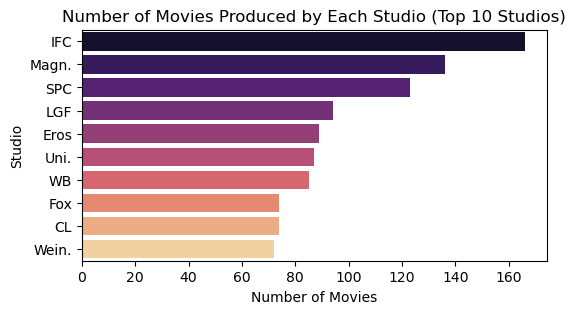

In [90]:
# visualize the studio size
# Choose the top  studios to display
top_studios = studio_sizes.nlargest(10)

# Filter the dataset for only the top studios
df_top_studios = df[df['studio'].isin(top_studios.index)]

# Plot the horizontal bar plot with the top studios

plt.figure(figsize=(6, 3))
sns.barplot(y=top_studios.index, x=top_studios.values, palette='magma')
plt.title('Number of Movies Produced by Each Studio (Top 10 Studios)')
plt.xlabel('Number of Movies')
plt.ylabel('Studio')
plt.show()



Explore Box Office Success


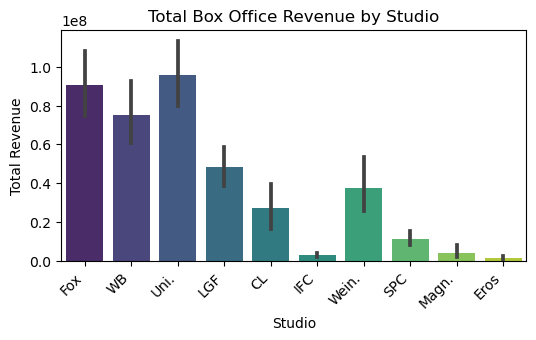

In [92]:
# Converting 'domestic_gross' and 'foreign_gross' to numeric
df_top_studios.loc[:, 'domestic_gross'] = pd.to_numeric(df_top_studios['domestic_gross'], errors='coerce')
df_top_studios.loc[:, 'foreign_gross'] = pd.to_numeric(df_top_studios['foreign_gross'], errors='coerce')

# Calculating total revenue by summing 'domestic_gross' and 'foreign_gross'
df_top_studios.loc[:, 'TotalRevenue'] = df_top_studios['domestic_gross'] + df_top_studios['foreign_gross']

plt.figure(figsize=(6, 3))
bar_plot = sns.barplot(x='studio', y='TotalRevenue', data=df_top_studios, palette='viridis')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Total Box Office Revenue by Studio')
plt.xlabel('Studio')
plt.ylabel('Total Revenue')
plt.show()


ANALYZE CORRELATION

In [94]:
print(df.dtypes)


title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [95]:
# Convert 'foreign_gross' column to numeric, coerce errors to NaN
df.loc[:, 'foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

# Check the data types again to ensure the conversion
print(df.dtypes)


title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [96]:
# Check for NaN values in 'domestic_gross' and 'foreign_gross' columns
nan_check = df[['domestic_gross', 'foreign_gross']].isna().any()
if nan_check.any():
    print(f"Warning: NaN values detected in columns {nan_check[nan_check].index.tolist()}. Removing rows with NaN values.")
    df = df.dropna(subset=['domestic_gross', 'foreign_gross'])

# Calculate correlation between studio size and box office success 
mean_domestic = df['domestic_gross'].mean()
mean_foreign = df['foreign_gross'].mean()

numerator = ((df['domestic_gross'] - mean_domestic) * (df['foreign_gross'] - mean_foreign)).sum()
denominator_domestic = ((df['domestic_gross'] - mean_domestic) ** 2).sum()
denominator_foreign = ((df['foreign_gross'] - mean_foreign) ** 2).sum()

correlation = numerator / np.sqrt(denominator_domestic * denominator_foreign)
print(f"Correlation between Studio Size and Box Office Success: {correlation:.2f}")



Correlation between Studio Size and Box Office Success: 0.42


The moderate association between studio size and box office success is indicated by the positive correlation (0.42). This suggests to Microsoft that bigger studios typically earn more money at the box office. This knowledge will help direct alliances, content acquisition plans, and investment choices by emphasising cooperation with bigger studios to maximise Microsoft's performance in the film business.


CONCLUSION

This data sheds light on important facets of the motion picture business. The traits of successful studios highlight how crucial it is for Microsoft's film studio to recognise and capitalise on these traits. Additionally, timing is crucial because box office performance is heavily influenced by annual trends. Microsoft can make wise judgements by having a strategic understanding of revenue distribution and outliers. Furthermore, the relationship between box office performance and studio size highlights how important production volume is to making a profit. Equipped with these discoveries, Microsoft can successfully navigate the cutthroat movie industry.
















RECOMMENDATIONS

Collaborate with Large Studios: Given the positive correlation between studio size and box office success, Microsoft should consider forming partnerships or collaborations with established and larger film studios. This can enhance the chances of producing movies with higher box office revenues.

Strategic Investments: Consider strategic investments in or acquisitions of larger studios to capitalize on their existing success and market presence. This can provide Microsoft with a strong foothold in the movie industry and increase the likelihood of box office hits.

Content Acquisition: Focus on acquiring content from larger studios that have a track record of box office success. This approach can contribute to building a diverse and successful movie portfolio for Microsoft.
